In [13]:
import pandas as pd
import seaborn as sns
import warnings
import pickle
import random
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from scipy import stats as ss

from sklearn.metrics       import mean_absolute_error, mean_squared_error

warnings.filterwarnings( 'ignore' )

In [2]:
%matplotlib inline
%pylab inline

plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 10

Populating the interactive namespace from numpy and matplotlib


In [3]:
def cross_validation(model_name,x_training,kfold,model,verbose=False):
  mae_list=[]
  mape_list=[]
  rmse_list=[]

  for k in range(kfold,0,-1):
    if verbose:
      print('\nKfold number: {}'.format(k))
    val_start_date=x_training['date'].max()- datetime.timedelta(days=k*6*7)
    val_end_date=x_training['date'].max()- datetime.timedelta(days=(k-1)*6*7)

    #filtering dataset
    training = x_training[x_training['date'] < val_start_date]
    validation = x_training[(x_training['date'] >= val_start_date) & (x_training['date'] >= val_end_date)]

    # training and validation dataset
    xtraining=training.drop(['date','sales'],axis=1)
    ytraining=training['sales']
    xvalidation=validation.drop(['date','sales'],axis=1)
    yvalidation=validation['sales']

    #model
    m=model.fit(xtraining,ytraining)

    #prediction
    yhat=m.predict(xvalidation)

    #performance
    m_result=ml_error(model_name,np.expm1(yvalidation),np.expm1(yhat))

    #store performance for each kfold iteration
    mae_list.append(m_result['MAE'])
    mape_list.append(m_result['MAPE'])
    rmse_list.append(m_result['RMSE'])

  return pd.DataFrame({ 'Model Name': model_name,
                        'MAE CV':np.round(np.mean(mae_list),2).astype(str)+' +/- '+np.round(np.std(mae_list),2).astype(str),
                        'MAPE CV':np.round(np.mean(mape_list),2).astype(str)+' +/- '+np.round(np.std(mape_list),2).astype(str),
                        'RMSE CV':np.round(np.mean(rmse_list),2).astype(str)+' +/- '+np.round(np.std(rmse_list),2).astype(str),
                        },index=[0])

def mean_percentage_error( y, yhat ):
    return np.mean( ( y - yhat ) / y )
     
    
def mean_absolute_percentage_error( y, yhat ):
    return np.mean( np.abs( ( y - yhat ) / y ) )

def ml_error(model_name,y,yhat):
    from sklearn.metrics import mean_absolute_error,mean_squared_error
    
    mae=mean_absolute_error(y,yhat)
    mape=mean_absolute_percentage_error(y,yhat)
    rmse=np.sqrt(mean_squared_error(y,yhat))
    
    return pd.DataFrame({'Model name': model_name,
                        'MAE': mae,
                        'MAPE': mape,
                        'RMSE': rmse}, index=[0])

# 9.0 Performance Resport

In [4]:
# add "/content/drive/MyDrive/dsp/" for colab

with open('code8_model_xgb_result_tuned.pkl', 'rb') as f:
    model_xgb_result_tuned = pickle.load(f)
with open('code8_model_xgb_tuned.pkl', 'rb') as f:
    model_xgb_tuned = pickle.load(f)
with open('code6_X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open('code7_x_test.pkl', 'rb') as f:
    x_test = pickle.load(f)
with open('code6_cols_selected_boruta.pkl', 'rb') as f:
    cols_selected_boruta = pickle.load(f)
with open('code6_feat_to_add.pkl', 'rb') as f:
    feat_to_add = pickle.load(f)

In [5]:
cols_selected_boruta_full=cols_selected_boruta.copy()

In [6]:
cols_selected_boruta_full.extend(feat_to_add)

In [7]:
cols_selected_boruta_full

['store',
 'promo',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'competition_time_month',
 'promo_time_week',
 'day_of_week_sin',
 'day_of_week_cos',
 'month_cos',
 'month_sin',
 'day_sin',
 'day_cos',
 'week_of_year_sin',
 'week_of_year_cos',
 'date',
 'sales']

In [8]:
X_test

,store,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,...,state_holiday_public_holiday,state_holiday_regular_day,day_of_week_sin,day_of_week_cos,month_sin,month_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos
0,1,2015-07-31,8.568646,1,1,2,1,-0.170968,9,2008,...,0,1,-0.974928,-0.222521,-5.000000e-01,-0.866025,-2.449294e-16,1.000000,-0.568065,-0.822984
1,2,2015-07-31,8.710290,1,1,0,1,-0.283871,11,2007,...,0,1,-0.974928,-0.222521,-5.000000e-01,-0.866025,-2.449294e-16,1.000000,-0.568065,-0.822984
2,3,2015-07-31,9.025816,1,1,0,1,1.903226,12,2006,...,0,1,-0.974928,-0.222521,-5.000000e-01,-0.866025,-2.449294e-16,1.000000,-0.568065,-0.822984
3,4,2015-07-31,9.546527,1,1,2,3,-0.275806,9,2009,...,0,1,-0.974928,-0.222521,-5.000000e-01,-0.866025,-2.449294e-16,1.000000,-0.568065,-0.822984
4,5,2015-07-31,8.481151,1,1,0,1,4.448387,4,2015,...,0,1,-0.974928,-0.222521,-5.000000e-01,-0.866025,-2.449294e-16,1.000000,-0.568065,-0.822984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47940,1111,2015-06-19,8.633909,1,0,0,1,-0.069355,6,2014,...,0,1,-0.974928,-0.222521,1.224647e-16,-1.000000,-6.513725e-01,-0.758758,0.120537,-0.992709
47941,1112,2015-06-19,9.327323,1,0,2,3,-0.072581,4,2006,...,0,1,-0.974928,-0.222521,1.224647e-16,-1.000000,-6.513725e-01,-0.758758,0.120537,-0.992709
47942,1113,2015-06-19,8.869961,1,0,0,3,1.117742,6,2015,...,0,1,-0.974928,-0.222521,1.224647e-16,-1.000000,-6.513725e-01,-0.758758,0.120537,-0.992709
47943,1114,2015-06-19,9.991269,1,0,0,3,-0.235484,6,2015,...,0,1,-0.974928,-0.222521,1.224647e-16,-1.000000,-6.513725e-01,-0.758758,0.120537,-0.992709


In [9]:
df9=X_test[cols_selected_boruta_full]

In [10]:
model_xgb_result_tuned

,Model name,MAE,MAPE,RMSE
0,XGBoost Regressor,765.146464,0.116287,1093.511057


In [11]:
#rescale
df9['sales']=np.expm1(df9['sales'])

#prediction
yhat_model_xgb_tuned=model_xgb_tuned.predict(x_test)
df9['prediction']=np.expm1(yhat_model_xgb_tuned)

In [14]:
#sum of prediction
df91=df9[['store','prediction']].groupby('store').sum().reset_index()

#MAE and MAPE
df9_aux1=df9[['store','sales','prediction']].groupby('store').apply(lambda x: mean_absolute_error(x['sales'],x['prediction'])).reset_index().rename(columns={0:'MAE'})
df9_aux2=df9[['store','sales','prediction']].groupby('store').apply(lambda x: mean_absolute_percentage_error(x['sales'],x['prediction'])).reset_index().rename(columns={0:'MAPE'})

#merge
df9_aux3=pd.merge(df9_aux1,df9_aux2,how='inner',on='store')
df92=pd.merge(df91,df9_aux3,how='inner',on='store')

In [16]:
#scenarios
df92['worst_scenario']=df92['prediction']-df92['MAE']
df92['best_scenario']=df92['prediction']+df92['MAE']

#order columns
df92=df92[['store','prediction','worst_scenario','best_scenario','MAE','MAPE']]

In [17]:
df92.head()

,store,prediction,worst_scenario,best_scenario,MAE,MAPE
0,1,170207.937500,169891.118553,170524.756447,316.818947,0.074229
1,2,180989.671875,180573.393522,181405.950228,416.278353,0.084812
2,3,267235.218750,266585.512636,267884.924864,649.706114,0.089641
3,4,344468.125000,343620.164511,345316.085489,847.960489,0.080127
4,5,176781.125000,176340.327366,177221.922634,440.797634,0.104063


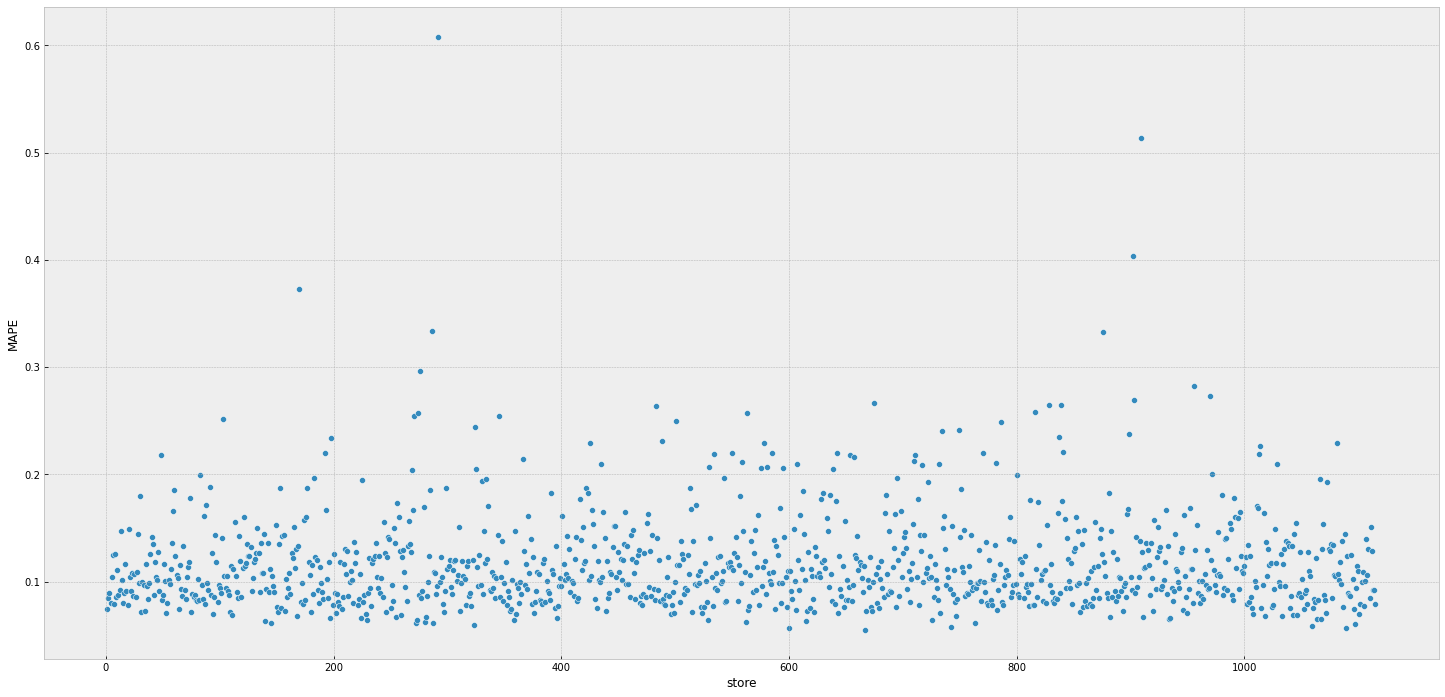

In [18]:
sns.scatterplot(x='store',y='MAPE',data=df92);

### 9.1 Total Performance

In [19]:
df93=df92[['prediction','worst_scenario','best_scenario']].apply(lambda x: np.sum(x),axis=0).reset_index().rename(columns={'index':'Scenario',0:'Values'})
df93['Values']=df93['Values'].map('R${:,.2f}'.format)
df93

,Scenario,Values
0,prediction,"R$287,905,504.00"
1,worst_scenario,"R$287,049,094.70"
2,best_scenario,"R$288,761,946.10"


### 9.2 Machine Learning Performance

In [20]:
df9['error']=df9['sales']-df9['prediction']
df9['error_rate']=df9['prediction']/df9['sales']

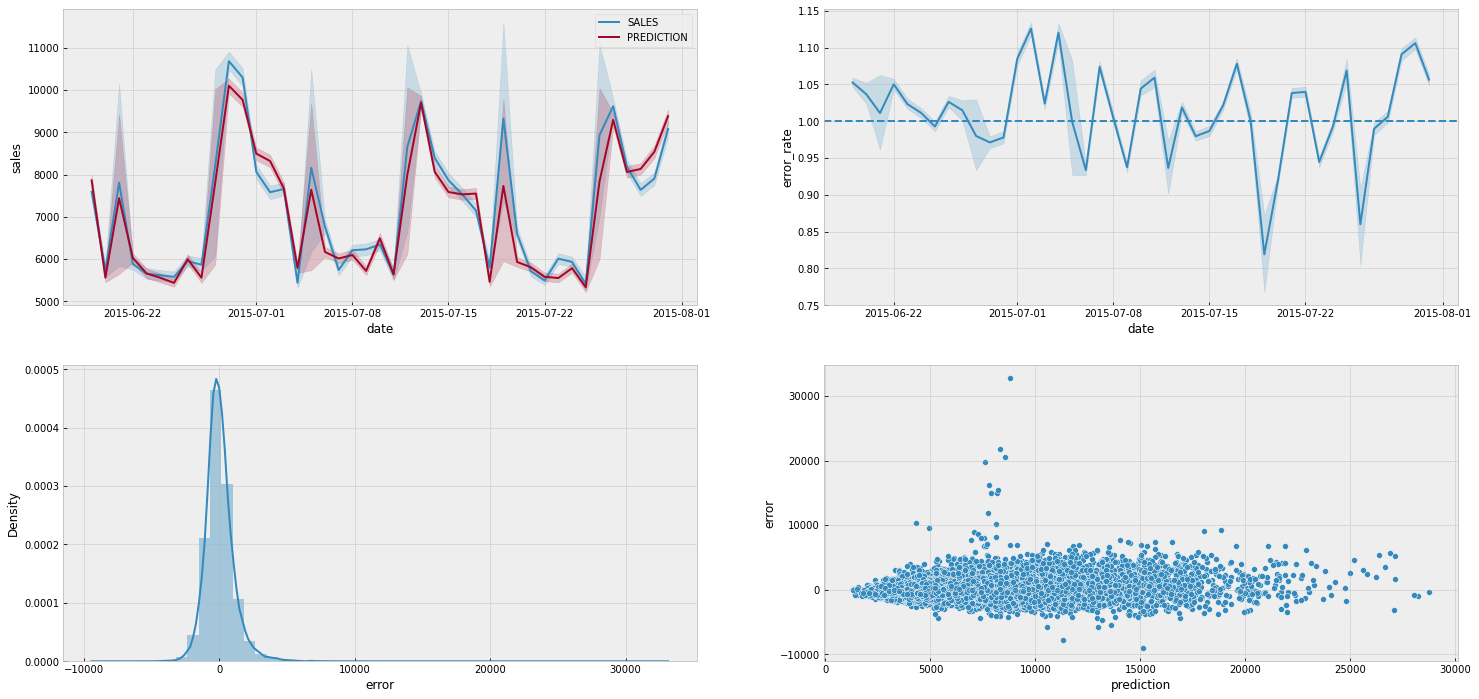

In [22]:
plt.subplot(2,2,1)
sns.lineplot(x='date',y='sales',data=df9,label='SALES')
sns.lineplot(x='date',y='prediction',data=df9,label='PREDICTION')

plt.subplot(2,2,2)
sns.lineplot(x='date',y='error_rate',data=df9)
plt.axhline(1,linestyle='--')

plt.subplot(2,2,3)
sns.distplot(df9['error'])

plt.subplot(2,2,4)
sns.scatterplot(df9['prediction'],df9['error']);

In [ ]:
#with open('code8_model_xgb_result_tuned.pkl', 'wb') as f:
 #   pickle.dump(model_xgb_result_tuned, f)